# KDE Box Fusion (KBF) Demo

KBF is a box fusion method that uses Kernel density estimation to combine the various boxes. 

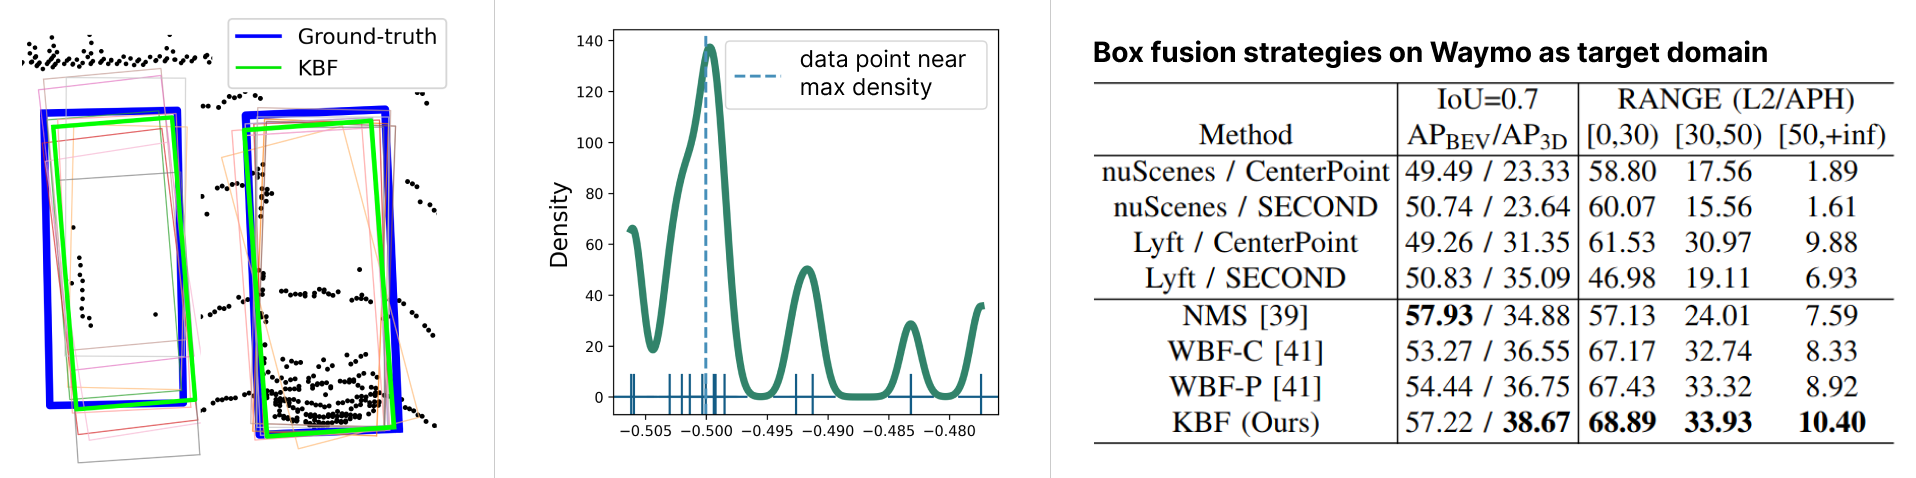

In [4]:
from IPython import display
display.Image("/MS3D/docs/media/kbf_demo.png")

In [1]:
import sys
sys.path.append('/MS3D')
import numpy as np
from pcdet.utils.box_fusion_utils import kbf

# Box format (N,9) (x,y,z,length,width,height,heading,class,score)
boxes = np.array([[-17.97, 8.29, 0.60, 4.30, 1.77, 1.56, 1.48, 1, 0.54],
                  [-18.15, 7.64, 0.76, 4.40, 1.83, 1.63, -1.67, 1, 0.37],
                  [-18.06, 7.83, 0.63, 4.56, 1.81, 1.57, 1.97, 1, 0.49],
                  [-18.01, 8.06, 0.74, 4.47, 1.83, 1.61, -4.87, 1, 0.36]])

# KDE Box Fusion
kbf(boxes, box_weights=boxes[:,-1])

array([-17.97      ,   8.29      ,   0.6       ,   4.43393939,
         1.81181818,   1.59181818,  -4.87      ,   1.        ,
         0.45454545])

In [2]:
# You can change the bandwidths for tuning. Higher bw is closer to average value
kbf(boxes, box_weights=boxes[:,-1], bw_c=1.0, bw_dim=1.0, bw_ry=0.1, bw_cls=0.5, bw_score=2.0)

array([-17.97      ,   8.29      ,   0.6       ,   4.43656566,
         1.81969697,   1.5889899 ,  -4.87      ,   1.        ,
         0.45454545])

In practice we grab all boxes of every detector and match boxes by building a KDTree of box centroids, then we query points within a certain radius of each other. For a full implementation see our `pcdet.utils.box_fusion_utils.label_fusion` function.

If you'd like to scale weights by detectors that you know perform better, you can multiply the box scores by a scalar and use those as box_weights. `box_weights` can be greater than 1.

In [3]:
detector_box_weights = [1,0,4,6]
kbf(boxes, box_weights=boxes[:,-1]*detector_box_weights)

array([-18.01      ,   8.06      ,   0.63      ,   4.44707071,
         1.80454545,   1.57868687,  -4.87      ,   1.        ,
         0.43636364])